In [75]:
%matplotlib inline
import importlib
import nn
importlib.reload(nn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nn import NeuralNetwork
from sklearn.metrics import accuracy_score, f1_score

In [4]:
data_rings3_train = pd.read_csv("dane_nn4/rings3-regular-training.csv")
X_rings3_train = data_rings3_train[['x', 'y']].values.reshape(-1, 2)
y_rings3_train = data_rings3_train['c'].values.reshape(-1, 1)

data_rings3_test = pd.read_csv("dane_nn4/rings3-regular-test.csv")
X_rings3_test = data_rings3_test[['x', 'y']].values.reshape(-1, 2)
y_rings3_test = data_rings3_test['c'].values.reshape(-1, 1)

data_easy_train = pd.read_csv("dane_nn4/easy-training.csv")
X_easy_train = data_easy_train[['x', 'y']].values.reshape(-1, 2)
y_easy_train = data_easy_train['c'].values.reshape(-1, 1)
y_easy_train = y_easy_train.astype(int)

data_easy_test = pd.read_csv("dane_nn4/easy-test.csv")
X_easy_test = data_easy_test[['x', 'y']].values.reshape(-1, 2)
y_easy_test = data_easy_test['c'].values.reshape(-1, 1)
y_easy_test = y_easy_test.astype(int)

data_xor3_train = pd.read_csv("dane_nn4/xor3-training.csv")
X_xor3_train = data_xor3_train[['x', 'y']].values.reshape(-1, 2)
y_xor3_train = data_xor3_train['c'].values.reshape(-1, 1)
y_xor3_train = y_xor3_train.astype(int)

data_xor3_test = pd.read_csv("dane_nn4/xor3-test.csv")
X_xor3_test = data_xor3_test[['x', 'y']].values.reshape(-1, 2)
y_xor3_test = data_xor3_test['c'].values.reshape(-1, 1)
y_xor3_test = y_xor3_test.astype(int)

In [45]:
def plot_classification_results(X_test, y_test, y_pred, title='Classification Results'):
    y_test = y_test.ravel()
    y_pred = y_pred.ravel()
    
    # Identify misclassified points
    misclassified = y_pred != y_test
    
    # Plot correctly classified points
    scatter = plt.scatter(X_test[~misclassified, 0], X_test[~misclassified, 1], 
                          c=y_test[~misclassified], cmap='viridis')
    
    # Plot misclassified points
    plt.scatter(X_test[misclassified, 0], X_test[misclassified, 1],
                color='red', marker='x', s=100, 
                label='Misclassified')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

## Easy dataset

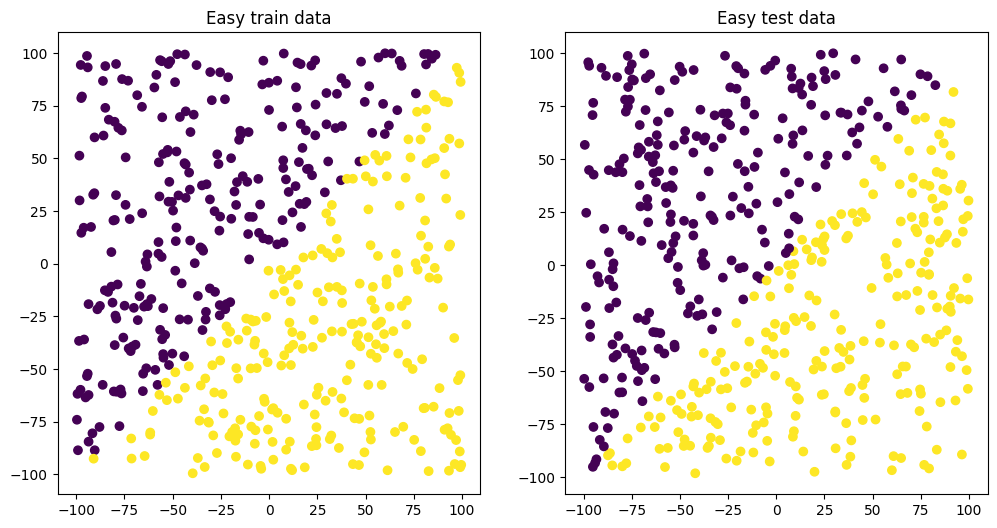

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_easy_train[:, 0], X_easy_train[:, 1], c=y_easy_train.ravel(), cmap='viridis')
plt.title("Easy train data")

plt.subplot(1, 2, 2)
plt.scatter(X_easy_test[:, 0], X_easy_test[:, 1], c=y_easy_test.ravel(), cmap='viridis')
plt.title("Easy test data")

plt.show()

In [78]:
input_size = X_easy_train.shape[1]
output_size = np.unique(y_easy_train).shape[0]

nn_easy = NeuralNetwork(X_easy_train, y_easy_train, [input_size, 10, output_size],
                         activation_fun='sigmoid', output_activation='softmax', loss_fun='crossentropy')

nn_easy.train(epochs=int(1e3), learning_rate=0.001, mini_batch=True, batch_size=16,
                             optimization='rmsprop', momentum=0.7, stop_condition=0, report_interval=10)

nn_easy_sigmoid = NeuralNetwork(X_easy_train, y_easy_train, [input_size, 10, output_size],
                            activation_fun='sigmoid', output_activation='sigmoid', loss_fun='crossentropy')
nn_easy_sigmoid.train(epochs=int(1e3), learning_rate=0.001, mini_batch=True, batch_size=16,
                                optimization='rmsprop', momentum=0.7, stop_condition=0, report_interval=10)


Starting loss: 0.73


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00] , Loss:  Current: 0.0001,Best: 0.0000



Training complete. Final loss: 0.0000
Starting loss: 0.91


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00] , Loss:  Current: 0.0005,Best: 0.0004


Training complete. Final loss: 0.0004


Accuracy with softmax: 0.9980
Accuracy with sigmoid: 0.9980

F1 Score with softmax: 0.9980
F1 Score with sigmoid: 0.9980


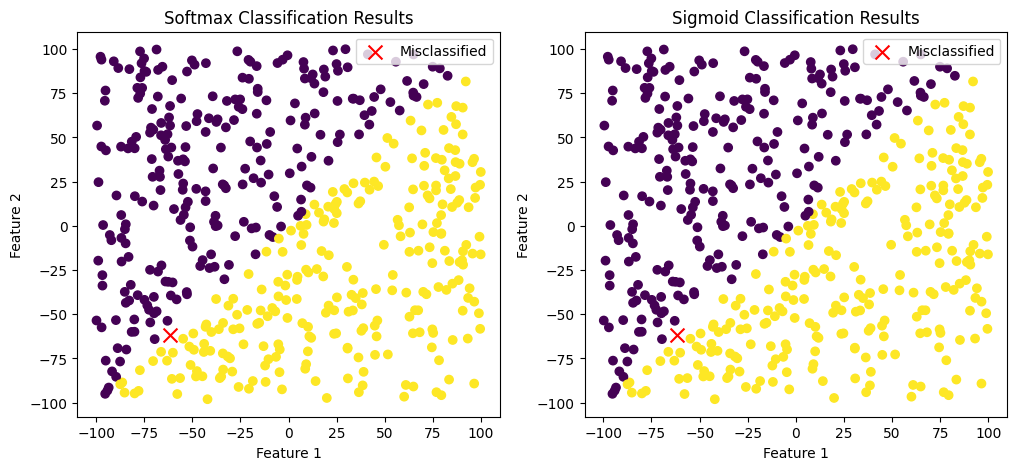

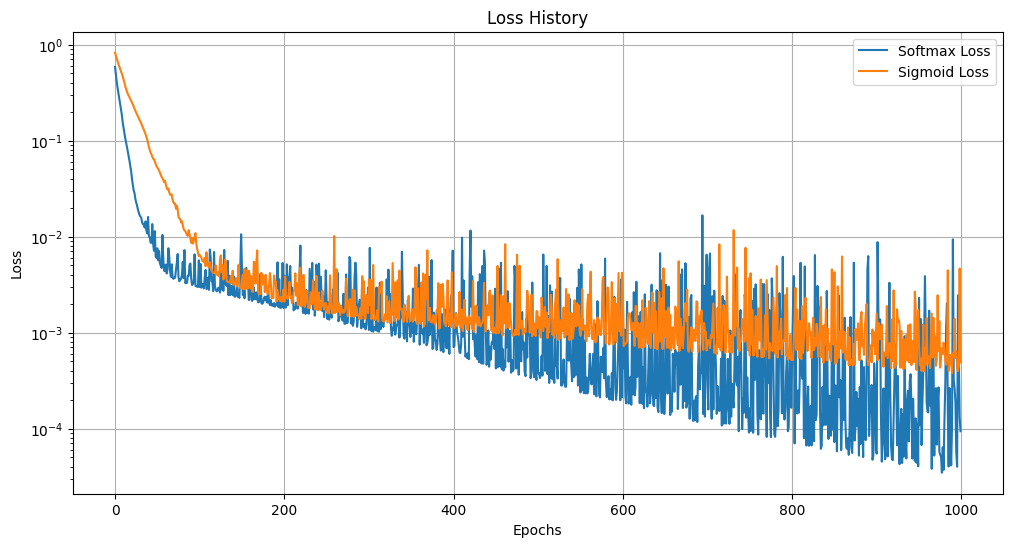

In [79]:
y_easy_pred = nn_easy.predict(X_easy_test)
y_easy_pred = np.argmax(y_easy_pred, axis=1).reshape(-1, 1)

y_easy_pred_sigmoid = nn_easy_sigmoid.predict(X_easy_test)
y_easy_pred_sigmoid = np.argmax(y_easy_pred_sigmoid, axis=1).reshape(-1, 1)

# accuracy
accuracy = accuracy_score(y_easy_test, y_easy_pred)
accuracy_sigmoid = accuracy_score(y_easy_test, y_easy_pred_sigmoid)
print(f"Accuracy with softmax: {accuracy:.4f}")
print(f"Accuracy with sigmoid: {accuracy_sigmoid:.4f}")
print("")

# f1 score
f1 = f1_score(y_easy_test, y_easy_pred, average='binary')
f1_sigmoid = f1_score(y_easy_test, y_easy_pred_sigmoid, average='binary')
print(f"F1 Score with softmax: {f1:.4f}")
print(f"F1 Score with sigmoid: {f1_sigmoid:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_classification_results(X_easy_test, y_easy_test, y_easy_pred, title='Softmax Classification Results')
plt.subplot(1, 2, 2)
plot_classification_results(X_easy_test, y_easy_test, y_easy_pred_sigmoid, title='Sigmoid Classification Results')

loss = nn_easy.model_history()
loss_sigmoid = nn_easy_sigmoid.model_history()
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Softmax Loss')
plt.plot(loss_sigmoid, label='Sigmoid Loss')
plt.yscale('log')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


## Rings 3 reglar dataset

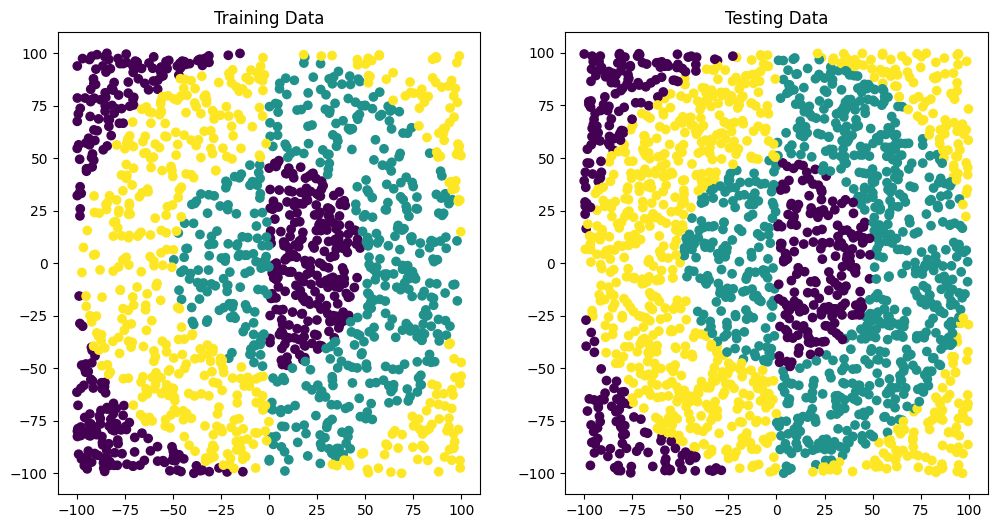

In [35]:
plt.figure(figsize=(12, 6))

# Plot training data
plt.subplot(1, 2, 1)
plt.scatter(X_rings3_train[:, 0], X_rings3_train[:, 1], c=y_rings3_train.ravel(), cmap='viridis')
plt.title('Training Data')

# Plot testing data
plt.subplot(1, 2, 2)
plt.scatter(X_rings3_test[:, 0], X_rings3_test[:, 1], c=y_rings3_test.ravel(), cmap='viridis')
plt.title('Testing Data')

plt.show()

In [48]:
input_size = X_rings3_train.shape[1]
output_size = np.unique(y_rings3_train).shape[0]
nn_rings3 = NeuralNetwork(X_rings3_train, y_rings3_train, 
                   [input_size, 32, 32, output_size],
                   activation_fun='sigmoid', 
                   output_activation='softmax',   
                   loss_fun='crossentropy')

nn_rings3.train(learning_rate=0.01, epochs=int(1000), validation_data=(X_rings3_test, y_rings3_test),
                        optimization='rmsprop', momentum=0, stop_condition=0.01, report_interval=10)
nn_rings3.train(learning_rate=0.001, epochs=int(5000), validation_data=(X_rings3_test, y_rings3_test), mini_batch=True, batch_size=32,
                        optimization='rmsprop', momentum=0, stop_condition=0.01, report_interval=10)
nn_rings3.train(learning_rate=0.0005, epochs=int(4000), validation_data=(X_rings3_test, y_rings3_test), mini_batch=True, batch_size=32,
                        optimization='rmsprop', momentum=0, stop_condition=0.01, report_interval=10)

nn_rings3_sigmoid = NeuralNetwork(X_rings3_train, y_rings3_train,
                   [input_size, 32, 32, output_size],
                   activation_fun='sigmoid', 
                   output_activation='sigmoid',   
                   loss_fun='crossentropy')

nn_rings3_sigmoid.train(learning_rate=0.01, epochs=int(1000), validation_data=(X_rings3_test, y_rings3_test),
                        optimization='rmsprop', momentum=0, stop_condition=0.01, report_interval=10)
nn_rings3_sigmoid.train(learning_rate=0.001, epochs=int(5000), validation_data=(X_rings3_test, y_rings3_test), mini_batch=True, batch_size=32,
                        optimization='rmsprop', momentum=0, stop_condition=0.01, report_interval=10)
nn_rings3_sigmoid.train(learning_rate=0.0005, epochs=int(4000), validation_data=(X_rings3_test, y_rings3_test), mini_batch=True, batch_size=32,
                        optimization='rmsprop', momentum=0, stop_condition=0.01, report_interval=10)

Starting loss: 1.41


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00] , Loss:  Current: 0.4365,Best: 0.3384



Training complete. Final loss: 0.3384
Starting loss: 0.40


Training: 100%|████████████████████████████████████████████████████████████████████████| 5000/5000 [02:29<00:00] , Loss:  Current: 0.0902,Best: 0.0815



Training complete. Final loss: 0.0815
Starting loss: 0.05


Training: 100%|████████████████████████████████████████████████████████████████████████| 4000/4000 [01:59<00:00] , Loss:  Current: 0.1310,Best: 0.0718



Training complete. Final loss: 0.0718
Starting loss: 0.92


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00] , Loss:  Current: 0.3687,Best: 0.3498



Training complete. Final loss: 0.3498
Starting loss: 0.35


Training: 100%|████████████████████████████████████████████████████████████████████████| 5000/5000 [02:39<00:00] , Loss:  Current: 0.1049,Best: 0.0917



Training complete. Final loss: 0.0917
Starting loss: 0.06


Training: 100%|████████████████████████████████████████████████████████████████████████| 4000/4000 [02:21<00:00] , Loss:  Current: 0.0989,Best: 0.0917


Training complete. Final loss: 0.0917


Accuracy with softmax: 0.9735
Accuracy with sigmoid: 0.9705

F1 Score with softmax: 0.9735
F1 Score with sigmoid: 0.9705


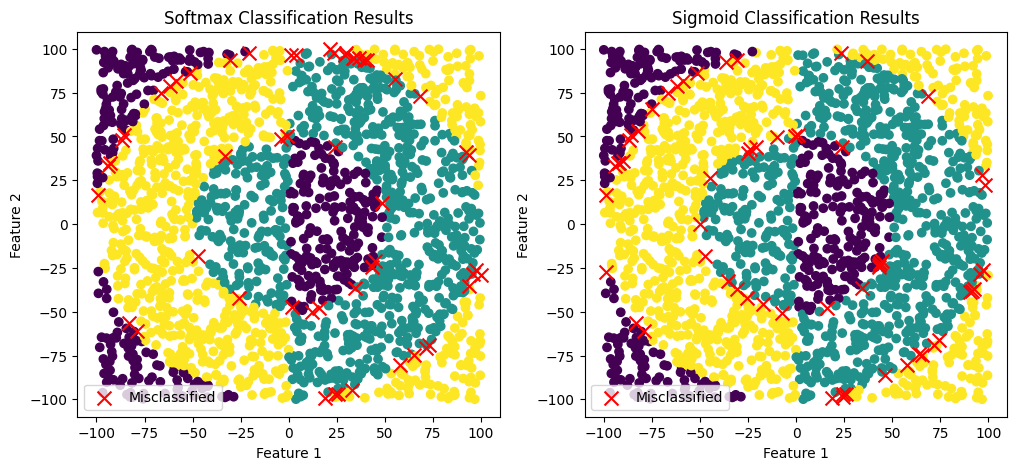

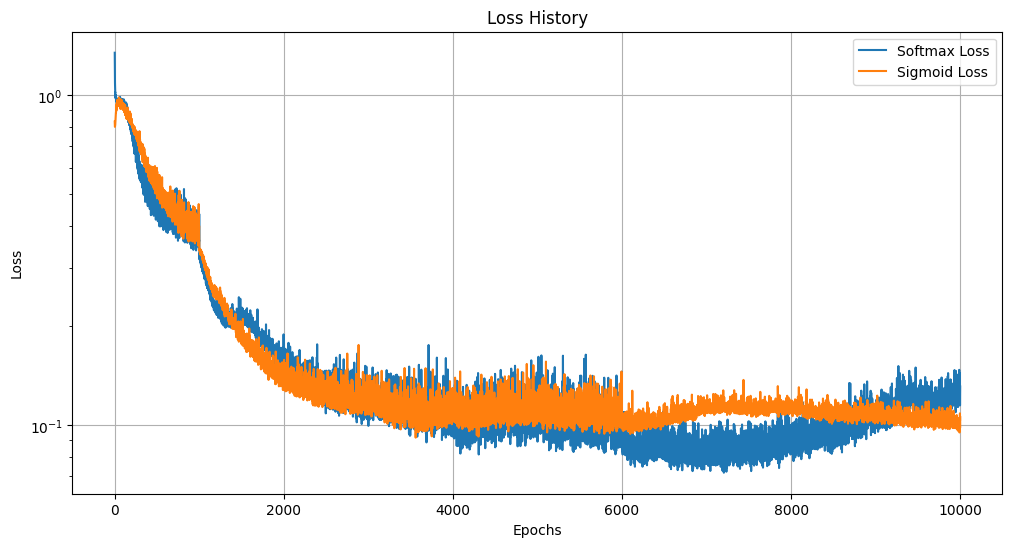

In [49]:
y_pred_rings3 = nn_rings3.predict(X_rings3_test)
y_pred_rings3 = np.argmax(y_pred_rings3, axis=1)
y_pred_rings3 = y_pred_rings3.reshape(-1, 1)
y_pred_rings3_sigmoid = nn_rings3_sigmoid.predict(X_rings3_test)
y_pred_rings3_sigmoid = np.argmax(y_pred_rings3_sigmoid, axis=1)
y_pred_rings3_sigmoid = y_pred_rings3_sigmoid.reshape(-1, 1)

accuracy = accuracy_score(y_rings3_test, y_pred_rings3)
accuracy_sigmoid = accuracy_score(y_rings3_test, y_pred_rings3_sigmoid)
print(f'Accuracy with softmax: {accuracy:.4f}')
print(f'Accuracy with sigmoid: {accuracy_sigmoid:.4f}')
print("")
# f1 score
f1 = f1_score(y_rings3_test, y_pred_rings3, average='weighted')
f1_sigmoid = f1_score(y_rings3_test, y_pred_rings3_sigmoid, average='weighted')
print(f'F1 Score with softmax: {f1:.4f}')
print(f'F1 Score with sigmoid: {f1_sigmoid:.4f}')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_classification_results(X_rings3_test, y_rings3_test, y_pred_rings3, title='Softmax Classification Results')
plt.subplot(1, 2, 2)
plot_classification_results(X_rings3_test, y_rings3_test, y_pred_rings3_sigmoid, title='Sigmoid Classification Results')

loss = nn_rings3.model_history()
loss_sigmoid = nn_rings3_sigmoid.model_history()
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Softmax Loss')
plt.plot(loss_sigmoid, label='Sigmoid Loss')
plt.yscale('log')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

## Xor3 dataset

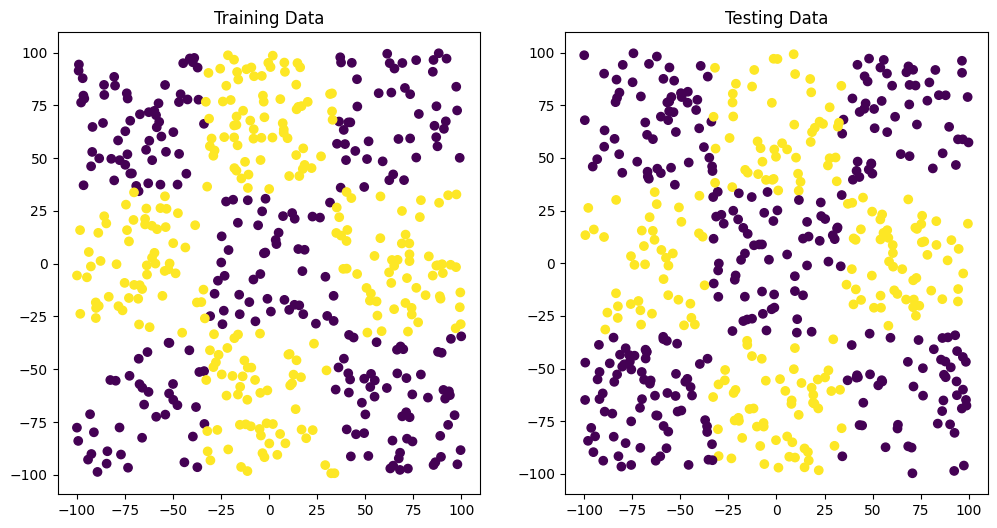

In [51]:
plt.figure(figsize=(12, 6))

# Plot training data
plt.subplot(1, 2, 1)
plt.scatter(X_xor3_train[:, 0], X_xor3_train[:, 1], c=y_xor3_train.ravel(), cmap='viridis')
plt.title('Training Data')

# Plot testing data
plt.subplot(1, 2, 2)
plt.scatter(X_xor3_test[:, 0], X_xor3_test[:, 1], c=y_xor3_test.ravel(), cmap='viridis')
plt.title('Testing Data')

plt.show()  

In [63]:
input_size = X_xor3_train.shape[1]
output_size = np.unique(y_xor3_train).shape[0]

nn_xor3 = NeuralNetwork(X_xor3_train, y_xor3_train, [input_size, 32, 32, output_size],
                         activation_fun='sigmoid', output_activation='softmax', loss_fun='crossentropy')

nn_xor3.train(learning_rate=0.01, epochs=int(1e3), validation_data=(X_xor3_test, y_xor3_test), mini_batch=True, batch_size=4,
                        optimization='rmsprop', momentum=0.7, stop_condition=0.01, report_interval=10)
nn_xor3.train(learning_rate=0.001, epochs=int(1e3), validation_data=(X_xor3_test, y_xor3_test), mini_batch=True, batch_size=4,
                        optimization='rmsprop', momentum=0.7, stop_condition=0.01, report_interval=10)
nn_xor3.train(learning_rate=0.0005, epochs=int(1e3), validation_data=(X_xor3_test, y_xor3_test), mini_batch=True, batch_size=4,
                        optimization='rmsprop', momentum=0.7, stop_condition=0.01, report_interval=10)

nn_xor3_sigmoid = NeuralNetwork(X_xor3_train, y_xor3_train, [input_size, 32, 32, output_size],
                            activation_fun='sigmoid', output_activation='sigmoid', loss_fun='crossentropy')

nn_xor3_sigmoid.train(learning_rate=0.01, epochs=int(1e3), validation_data=(X_xor3_test, y_xor3_test), mini_batch=True, batch_size=4,
                        optimization='rmsprop', momentum=0.7, stop_condition=0.01, report_interval=10)
nn_xor3_sigmoid.train(learning_rate=0.001, epochs=int(1e3), validation_data=(X_xor3_test, y_xor3_test), mini_batch=True, batch_size=4,
                        optimization='rmsprop', momentum=0.7, stop_condition=0.01, report_interval=10)
nn_xor3_sigmoid.train(learning_rate=0.0005, epochs=int(1e3), validation_data=(X_xor3_test, y_xor3_test), mini_batch=True, batch_size=4,
                        optimization='rmsprop', momentum=0.7, stop_condition=0.01, report_interval=10)

Starting loss: 0.73


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00] , Loss:  Current: 0.3963,Best: 0.3005



Training complete. Final loss: 0.3005
Starting loss: 0.14


Training:  99%|████████████████████████████████████████████████████████████████████████ | 988/1000 [00:22<00:00] , Loss:  Current: 0.3675,Best: 0.1371


KeyboardInterrupt: 

Accuracy with softmax: 0.9660
Accuracy with sigmoid: 0.9660

F1 Score with softmax: 0.9598
F1 Score with sigmoid: 0.9598


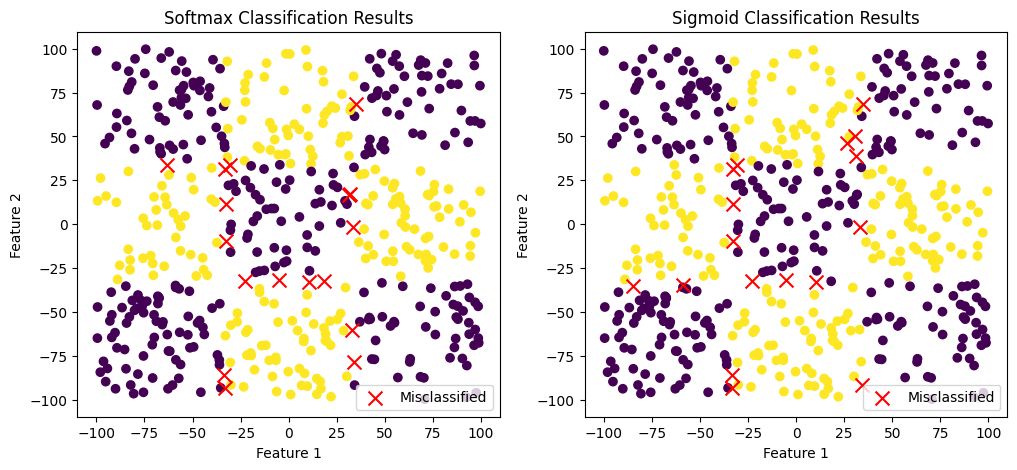

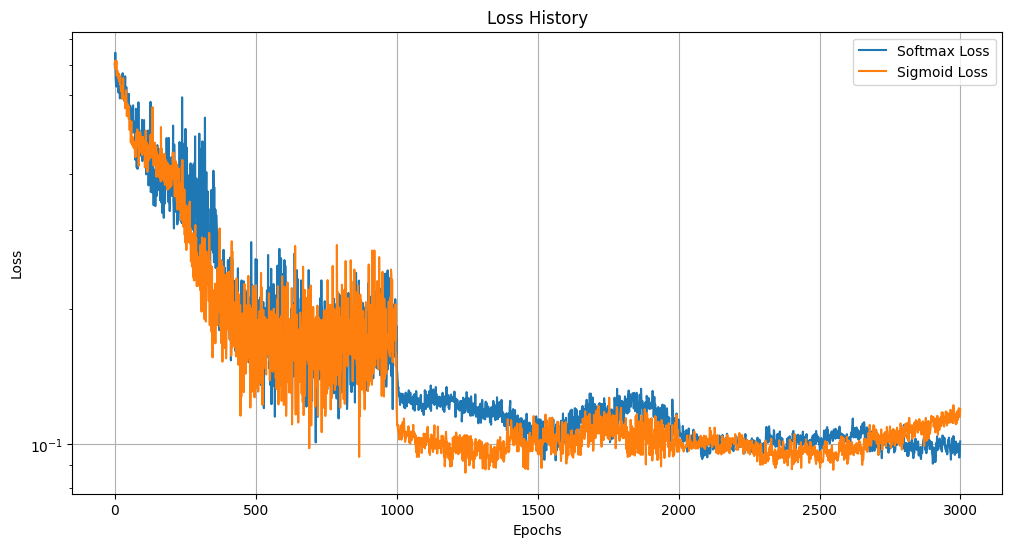

In [53]:
y_xor3_pred = nn_xor3.predict(X_xor3_test) 
y_xor3_pred = np.argmax(y_xor3_pred, axis=1).reshape(-1, 1)
y_xor3_pred_sigmoid = nn_xor3_sigmoid.predict(X_xor3_test)
y_xor3_pred_sigmoid = np.argmax(y_xor3_pred_sigmoid, axis=1).reshape(-1, 1)

accuracy = accuracy_score(y_xor3_test, y_xor3_pred)
accuracy_sigmoid = accuracy_score(y_xor3_test, y_xor3_pred_sigmoid)
print(f'Accuracy with softmax: {accuracy:.4f}')
print(f'Accuracy with sigmoid: {accuracy_sigmoid:.4f}')
print("")

f1 = f1_score(y_xor3_test, y_xor3_pred, average='binary')
f1_sigmoid = f1_score(y_xor3_test, y_xor3_pred_sigmoid, average='binary')
print(f'F1 Score with softmax: {f1:.4f}')
print(f'F1 Score with sigmoid: {f1_sigmoid:.4f}')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_classification_results(X_xor3_test, y_xor3_test, y_xor3_pred, title='Softmax Classification Results')
plt.subplot(1, 2, 2)
plot_classification_results(X_xor3_test, y_xor3_test, y_xor3_pred_sigmoid, title='Sigmoid Classification Results')

loss = nn_xor3.model_history()
loss_sigmoid = nn_xor3_sigmoid.model_history()
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Softmax Loss')
plt.plot(loss_sigmoid, label='Sigmoid Loss')
plt.yscale('log')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()